In [ ]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Github

/content/drive/MyDrive/Github


In [ ]:
%cd 'Project'

/content/drive/MyDrive/Github/Project


In [ ]:
%cd 'Babita_Project'

/content/drive/MyDrive/Github/Project/Babita_Project


   Treatment  Bulk_density  Volume_of_media_initial  Total_porosity  \
0    Control         220.5                 0.001426           0.680   
1    Mulch25         219.3                 0.001200           0.848   
2    Mulch50         228.0                 0.001080           0.847   
3    Mulch75         192.2                 0.001426           0.798   
4    B300_25         246.0                 0.001410           0.685   
5    B300_50         264.0                 0.001308           0.702   
6    B300_75         251.3                 0.001436           0.634   
7    B400_25         255.3                 0.001444           0.707   
8    B400_50         249.0                 0.001486           0.653   
9    B400_75         255.3                 0.001484           0.624   
10   B500_25         244.9                 0.001544           0.641   
11   B500_50         238.7                 0.001506           0.660   
12   B500_75         236.9                 0.001400           0.743   

    W

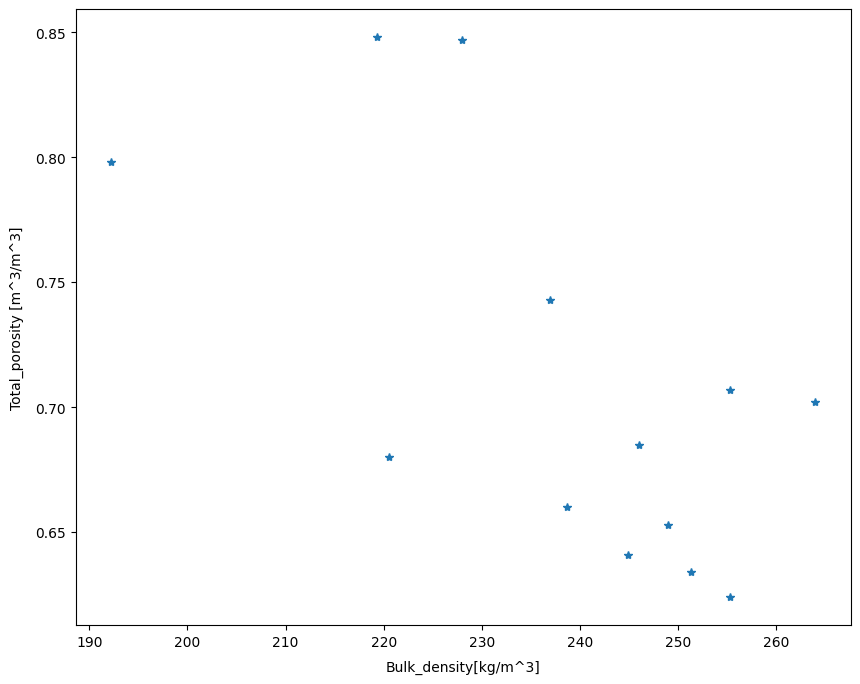

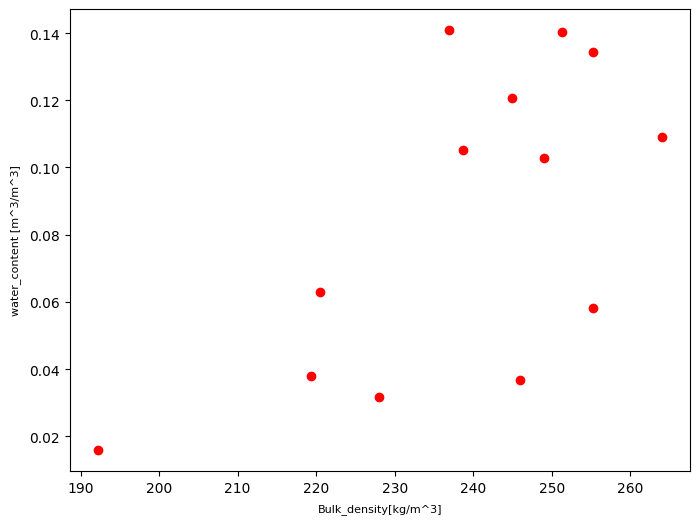

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Github/Project/Babita_Project/BD_TP_try.csv')
print(df) #print out the data
print("Columns:", df.columns) #print out the names of the column
# Remove any trailing spaces from column names
df.columns = df.columns.str.strip()


#Volume_after_shrinkage = Volume_of_media_initial-volume_above_the_top_of_the_media
volume_of_media_initial=df['Volume_of_media_initial'] #m3
#Volume_after_shrinkage = Volume_of_media_initial-volume_above_the_top_of_the_media
volume_of_media_after_shrinkage= volume_of_media_initial-0.00026 #0.0015-0.00026 in m^3

bulk_density = df['Bulk_density'] #kg/m3
total_porosity = df['Total_porosity'] #m3/m3
#total_porosity=volume of water applied to the media/total volume of substrate
water_content = df['Water_content'] #m3/m3
volume_of_water_applied = df['Water_applied'] #m3/m3
mass_of_solid= 0.355 #kg
volume_of_solid = volume_of_media_after_shrinkage-volume_of_water_applied
air_filled_capacity= volume_of_media_after_shrinkage-((water_content*volume_of_media_after_shrinkage) + volume_of_solid)

#volume of water applied =immediately after water applied
#volume of water content=after the leaching(measured normally 2 hours after irrigateion)
#volume_of_solid=mass_of_solid/particle_density
#particle_density= mass_of_solid/(bulk_density/(1-total_porosity))

#if there is shrinkage then calculate the volume of shrinkage with the help of depth and radius of pot) (need to use the pot having same diameter)
#Volume_after_shrinkage = Volume_of_pot (initial_volume)-volume_above_the_top_of_the_media
#volume_of_solid= 2000. #Volume_after_shrinkage(cm3)

print("Volume_of_solid:", volume_of_solid)
print("air_filled_capacity:",air_filled_capacity)
fig=plt.figure(figsize=(10,8))
plt.xlabel('Bulk_density[kg/m^3]', fontsize=10, labelpad=8)
plt.ylabel('Total_porosity [m^3/m^3]', fontsize=10, labelpad=8)
plt.plot(bulk_density,total_porosity,'*')
fig=plt.figure(figsize=(8,6))
plt.xlabel('Bulk_density[kg/m^3]', fontsize=8, labelpad=6)
plt.ylabel('water_content [m^3/m^3]', fontsize=8, labelpad=6)
plt.plot(bulk_density,water_content,'ro')

   Treatment  Bulk_density_kg/m3  theta_sc 
0    Control               220.5      0.680
1    Mulch25               219.3      0.848
2    Mulch50               228.0      0.847
3    Mulch75               192.2      0.798
4    B300_25               246.0      0.685
5    B300_50               264.0      0.702
6    B300_75               251.3      0.634
7    B400_25               255.3      0.707
8    B400_50               249.0      0.653
9    B400_75               255.3      0.624
10   B500_25               244.9      0.641
11   B500_50               238.7      0.660
12   B500_75               236.9      0.743
Columns: Index(['Treatment', 'Bulk_density_kg/m3', 'theta_sc '], dtype='object')


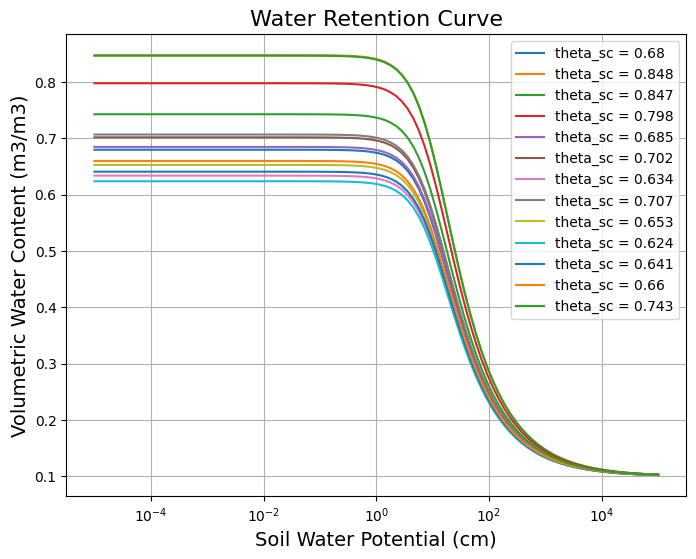

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#thetar= (Winitial-Wfinal/Winitial)*100.
#thetas=total_porosity
#Winitial=initial weight of sample before drying
#Wfinal=final weight of sample after drying
#BD=(wt_media/v_media) #kg/m3
#total_porosity=(ml_water/ml_media) #m3/m3

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Github/Project/Babita_Project/BD_TP.csv')
print(df) #print out the data
print("Columns:", df.columns) #print out the names of the column
# Remove any trailing spaces from column names
df.columns = df.columns.str.strip()

# Check if 'theta_sc' column exists in the DataFrame
if 'theta_sc' in df.columns:
    theta_s_values = df['theta_sc']
else:
    raise KeyError('The "theta_sc" column does not exist in the DataFrame.')
theta_s_values = df['theta_sc']
treatment_names = df['Treatment']

# Soil properties for soilless growing media
#At saturation point, saturated water content=total porosity
#theta-r, alpha, and n are assumed values
theta_r = 0.1  #Residual water content
alpha = 0.1  #Inverse of the air entry suction [1/cm]
n = 1.6  # Porosity exponent
m = 1 - (1/n)  # Van Genuchten exponent

# Define the van Genuchten equation
def van_genuchten(theta_s, theta_r, alpha, n, m, psi):
    theta = theta_r + (theta_s - theta_r) / (1 + (alpha * abs(psi))**n)**m
    return theta

# Define a range of soil water potentials
psi_range = np.logspace(-5, 5, 100)  # Soil water potential [cm]

# Plot water retention curves for each theta_sc value
plt.figure(figsize=(8, 6))
for theta_s in theta_s_values:
    # Calculate water content using van Genuchten model
  theta = van_genuchten(theta_s, theta_r, alpha, n, m, psi_range)

    # Plot the water retention curve
  plt.plot(psi_range, theta, label=f'theta_sc = {theta_s}')
    #plt.plot(psi_range, theta, label=f'Treatment: {treatment_name}, theta_sc: {theta_s}')
# Plot settings
plt.title('Water Retention Curve', fontsize=16)
plt.xlabel('Soil Water Potential (cm)', fontsize=14)
plt.ylabel('Volumetric Water Content (m3/m3)', fontsize=14)
plt.xscale('log')  # Log scale for better visualization
plt.grid(True)
plt.legend()
plt.show()